In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

C:\Users\krist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\krist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [20]:
df = pd.read_csv('Dummy_data.csv')
df.drop(['customerid'],axis=1, inplace = True)
X = df.drop(['churn_Yes'],axis=1)
y = df['churn_Yes']
X.head()

,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [3]:
'''from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)
'''

'from sklearn.preprocessing import StandardScaler\n\nsc = StandardScaler()\n\nX = sc.fit_transform(X)\n'

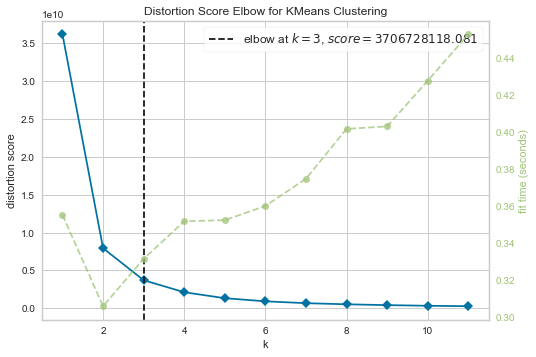

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)
visualizer.show()

In [5]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [6]:
y_predicted = kmeans.fit_predict(X)
y_predicted

array([1, 1, 1, ..., 1, 1, 0])

In [7]:
X['cluster'] = y_predicted
X.head(20)

,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,...,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,cluster
0,1,29.85,29.85,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,1
2,2,53.85,108.15,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,2,70.70,151.65,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
5,8,99.65,820.50,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,1,0,1
6,22,89.10,1949.40,1,0,0,1,1,1,0,...,1,0,1,0,0,0,1,0,0,1
7,10,29.75,301.90,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
8,28,104.80,3046.05,0,0,1,0,1,1,0,...,1,0,1,0,0,0,0,1,0,2
9,62,56.15,3487.95,1,0,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,2


In [8]:
print(kmeans.labels_[:20])
print(len(kmeans.labels_))

[1 1 1 1 1 1 1 1 2 2 1 1 0 0 2 0 1 0 1 1]
7043


In [9]:
kmeans.cluster_centers_

array([[ 6.43848606e+01,  9.79792430e+01,  6.29777869e+03,
         4.99601594e-01,  2.16733068e-01,  7.40239044e-01,
         3.36254980e-01,  9.98406375e-01,  8.29482072e-01,
         5.76095618e-01,  7.50597610e-01,  7.49003984e-01,
         5.98406375e-01,  8.07171315e-01,  8.17529880e-01,
         7.10756972e-01,  2.29482072e-01,  7.70517928e-01,
        -2.77555756e-17,  1.81673307e-01,  3.01195219e-01,
         5.17131474e-01,  3.27490040e-01,  3.32270916e-01,
         2.88446215e-01,  5.17928287e-02],
       [ 1.82136015e+01,  4.97418103e+01,  6.85947270e+02,
         5.01436782e-01,  1.28352490e-01,  3.77155172e-01,
         2.86877395e-01,  8.91044061e-01,  2.70114943e-01,
         1.44636015e-01,  1.59243295e-01,  1.53496169e-01,
         1.41283525e-01,  1.95162835e-01,  1.95162835e-01,
         5.25862069e-01,  3.21599617e-01,  3.13457854e-01,
         3.64942529e-01,  6.86781609e-01,  1.45593870e-01,
         1.67624521e-01,  1.64990421e-01,  1.64032567e-01,
         3.45

In [10]:
kmeans.n_iter_

20

In [11]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 4176, 2: 1612, 0: 1255})

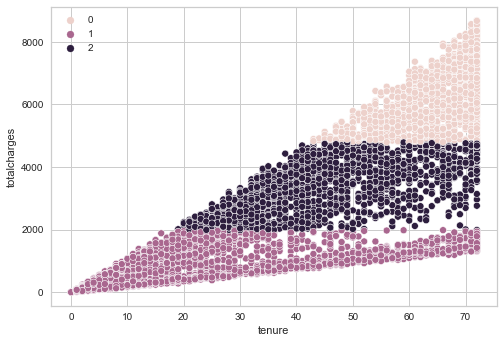

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="tenure", y="totalcharges", hue=kmeans.labels_)
plt.show()

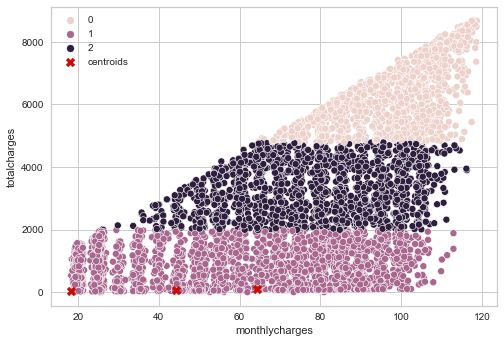

In [13]:
sns.scatterplot(data=df, x="monthlycharges", y="totalcharges", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(f'Explained variance ratio from PCA: {pca.explained_variance_ratio_}')

Explained variance ratio from PCA: [9.99860483e-01 1.22084939e-04]


In [15]:
principalDf

,principal component 1,principal component 2
0,-2250.292760,-8.902589
1,-390.257146,-6.263266
2,-2171.782443,11.877322
3,-439.031384,-24.072183
4,-2128.140223,26.848647
...,...,...
7038,-289.113316,22.764064
7039,5083.459429,-2.343887
7040,-1933.629957,-14.751690
7041,-1973.152199,28.687066


In [21]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [22]:
finalDf

,principal component 1,principal component 2,churn_Yes
0,-2250.292760,-8.902589,0
1,-390.257146,-6.263266,0
2,-2171.782443,11.877322,1
3,-439.031384,-24.072183,0
4,-2128.140223,26.848647,1
...,...,...,...
7038,-289.113316,22.764064,0
7039,5083.459429,-2.343887,0
7040,-1933.629957,-14.751690,0
7041,-1973.152199,28.687066,1


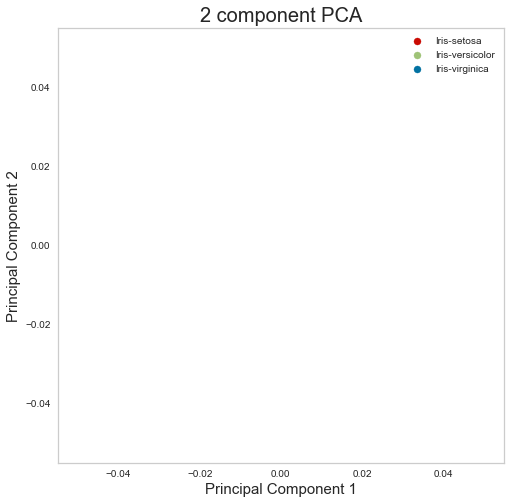

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = y
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['churn_Yes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()